# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [10]:
import pandas as pd

!wget https://github.com/MicrosoftDocs/ml-basics/raw/master/challenges/data/clusters.csv
data = pd.read_csv('clusters.csv')
#Display a random sample of 20 observations
data.sample(20)

--2022-05-06 13:43:27--  https://github.com/MicrosoftDocs/ml-basics/raw/master/challenges/data/clusters.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/clusters.csv [following]
--2022-05-06 13:43:27--  https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/clusters.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56935 (56K) [text/plain]
Saving to: ‘clusters.csv.1’

clusters.csv.1      100%[===================>]  55.60K  --.-KB/s    in 0.007s  

2022-05-06 13:43:27 (8.21 MB/s) - ‘clusters.csv.1’ saved [56935/5693

,A,B,C
732,0.980346,0.696880,1.143412
744,0.462661,0.463758,0.184425
630,0.320682,0.532726,0.085038
687,-0.230426,-0.634563,-0.408657
790,1.340023,1.995296,0.576401
380,0.368247,0.904930,0.544022
467,2.285214,2.669029,2.253543
490,0.027445,0.796576,0.723860
258,2.841565,2.593668,2.810949
898,1.166479,-0.334977,-0.753738


## Create a 2 Dimension of features

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features = MinMaxScaler().fit_transform(data)

pca= PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:20]



array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ],
       [-0.39092216,  0.10924659],
       [ 0.08680418, -0.03434495],
       [ 0.20568275, -0.01196657],
       [ 0.00226016, -0.27851539],
       [-0.25236109, -0.16231102],
       [-0.09797267, -0.07050518],
       [-0.32881889,  0.12683088],
       [ 0.09423205,  0.0014651 ],
       [ 0.00958281,  0.09838745],
       [-0.07348505, -0.02594306]])

## Visualize to a aplot

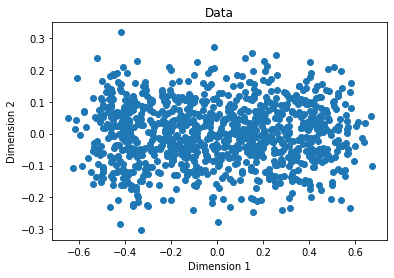

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

## Plot the WCSS for each model

AttributeError: ignored

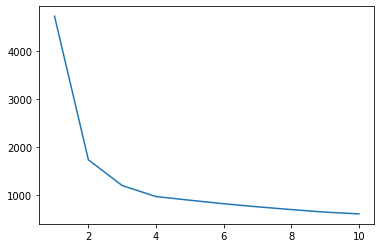

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss= []
for i in range(1,11):
  kmeans= KMeans(n_clusters= i)
  kmeans.fit(data.values)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.titile('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## K-Mean Clustering

In [33]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000)

km_clusters= model.fit_predict(data.values)
km_clusters

array([2, 2, 1, 1, 2, 2, 1, 3, 2, 2, 1, 0, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3,
       2, 2, 3, 0, 1, 2, 0, 3, 0, 2, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 1, 0,
       1, 2, 2, 1, 1, 3, 2, 0, 1, 1, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3,
       0, 3, 0, 1, 0, 3, 3, 1, 0, 3, 3, 3, 2, 0, 3, 0, 1, 0, 3, 1, 0, 3,
       3, 0, 0, 0, 1, 3, 0, 3, 1, 3, 1, 0, 3, 0, 1, 0, 3, 0, 1, 3, 3, 1,
       3, 0, 2, 2, 0, 1, 0, 1, 2, 0, 3, 0, 1, 1, 2, 3, 0, 3, 1, 2, 0, 0,
       0, 3, 0, 0, 3, 2, 3, 0, 2, 0, 0, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 3,
       2, 0, 2, 3, 3, 3, 0, 2, 1, 1, 3, 0, 0, 2, 2, 1, 2, 0, 3, 1, 3, 0,
       0, 3, 3, 2, 3, 2, 0, 0, 3, 1, 2, 1, 1, 0, 0, 2, 0, 3, 1, 0, 3, 3,
       2, 1, 0, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 0, 2, 1, 3, 3, 1, 2, 1,
       3, 2, 0, 1, 0, 3, 0, 2, 0, 2, 3, 2, 0, 3, 2, 1, 1, 2, 1, 0, 1, 0,
       1, 3, 3, 0, 1, 2, 2, 3, 1, 3, 0, 0, 1, 1, 1, 2, 1, 2, 3, 1, 1, 3,
       2, 3, 0, 0, 0, 3, 1, 2, 3, 0, 2, 0, 1, 3, 3, 2, 1, 1, 0, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 3, 3, 0, 2, 1,

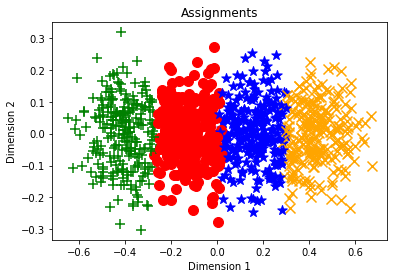

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
  col_dic= {0: 'blue', 1: 'green', 2:'orange',3:'red'}
  mrk_dic= {0:'*', 1:'+', 2:'x', 3:'o'}
  colors= [col_dic[x] for x in clusters]
  markers= [mrk_dic[x] for x in clusters]
  for sample in range(len(clusters)):
      plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.title('Assignments')
  plt.show()

plot_clusters(features_2d, km_clusters)



## Agglomerative Clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(data.values)
agg_clusters

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

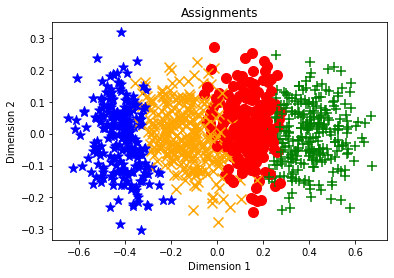

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
  col_dic= {0: 'blue', 1: 'green', 2:'orange',3:'red'}
  mrk_dic= {0:'*', 1:'+', 2:'x', 3:'o'}
  colors= [col_dic[x] for x in clusters]
  markers= [mrk_dic[x] for x in clusters]
  for sample in range(len(clusters)):
      plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.title('Assignments')
  plt.show()

plot_clusters(features_2d, agg_clusters)